In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb

In [76]:
study = "docnet"
subj_list = list(range(1001, 1013))
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = f'{study_dir}/derivatives/results'
rois = ['PPC_spaceloc', 'APC_spaceloc', 'LO_toolloc', 'PFS_toolloc']
roi_names = ['PPC', 'APC', 'LO', 'PFS']

exps = ['catmvpa']
copes = [1, 1, 1, 1, 5]
suf = '_roi'


cond_names = ['Space', 'Feature' ,'3D Shape', '2D Shape', 'Tools', 'Non-tools', 'Distance', 'Brightness']


num_vox = 200

#template = datasets.load_mni152_template()

In [77]:
def plot_bar(df, ylabel):

    y_min = np.min(df[ylabel])
    y_max = np.max(df[ylabel]) +2

    print(ggplot(df, aes(x='Condition', y=ylabel, color = 'Condition', fill = 'Condition')) + geom_col(color="black", position =position_dodge(width =1)) +  facet_wrap('~roi', scales='free') + \
    geom_linerange(aes(x='Condition',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
            theme_classic() + xlab('Conditions') + ylab(ylabel) + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (15, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank()))

In [49]:
df = pd.read_csv(f'{study_dir}/derivatives/results/catmvpa/mvpa_summary_split.csv')
df_cat = df[df['roi'] == 'rAPC_spaceloc']

In [63]:
summary_df

,roi,Condition,Correlation
13,rAPC_spaceloc,identity,0.985166
33,rAPC_spaceloc,category,0.986279
53,rAPC_spaceloc,between,1.003799


In [60]:
df_mean = df[['roi', 'identity', 'category', 'between']]
df_se = df[['roi', 'identity_se', 'category_se', 'between_se']]

#melt dfs
df_mean = pd.melt(df_mean,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')
df_se = pd.melt(df_se,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')
rr= 'APC_spaceloc'

In [64]:
#Append correlations
summary_df = df_mean[df_mean['roi'] == f'l{rr}']
summary_df = summary_df.append(df_mean[df_mean['roi'] == f'r{rr}'])

#combine SEs
se_df = df_se[df_se['roi'] == f'l{rr}']['Correlation']
se_df = se_df.append(df_se[df_se['roi'] == f'r{rr}']['Correlation'])

summary_df['se'] = se_df

In [65]:
summary_df

,roi,Condition,Correlation,se
3,lAPC_spaceloc,identity,0.938141,0.052685
23,lAPC_spaceloc,category,1.039977,0.038888
43,lAPC_spaceloc,between,0.995130,0.010658
13,rAPC_spaceloc,identity,0.985166,0.046285
33,rAPC_spaceloc,category,0.986279,0.009046
53,rAPC_spaceloc,between,1.003799,0.001951


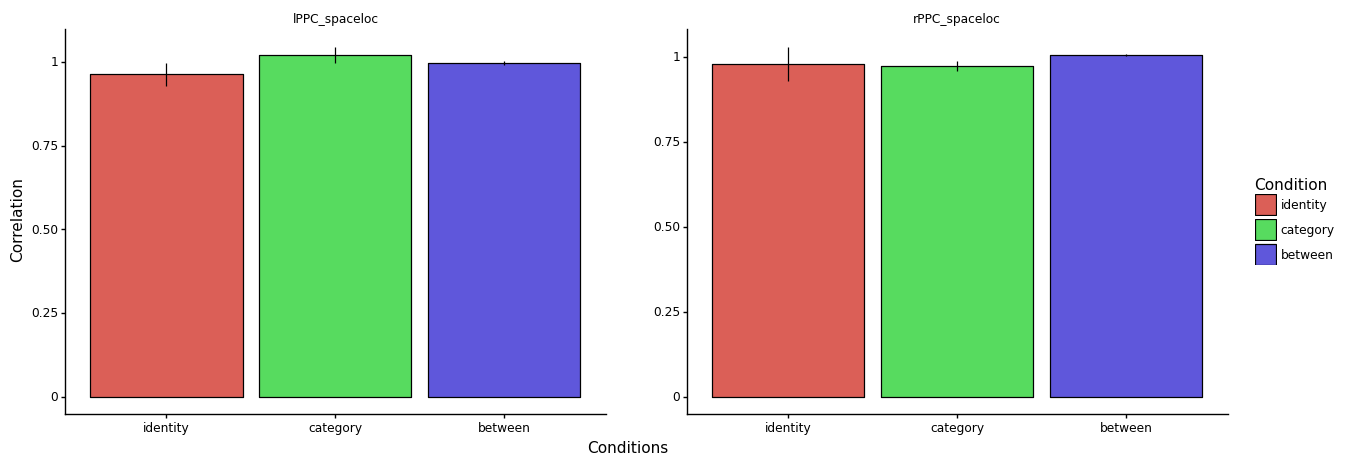

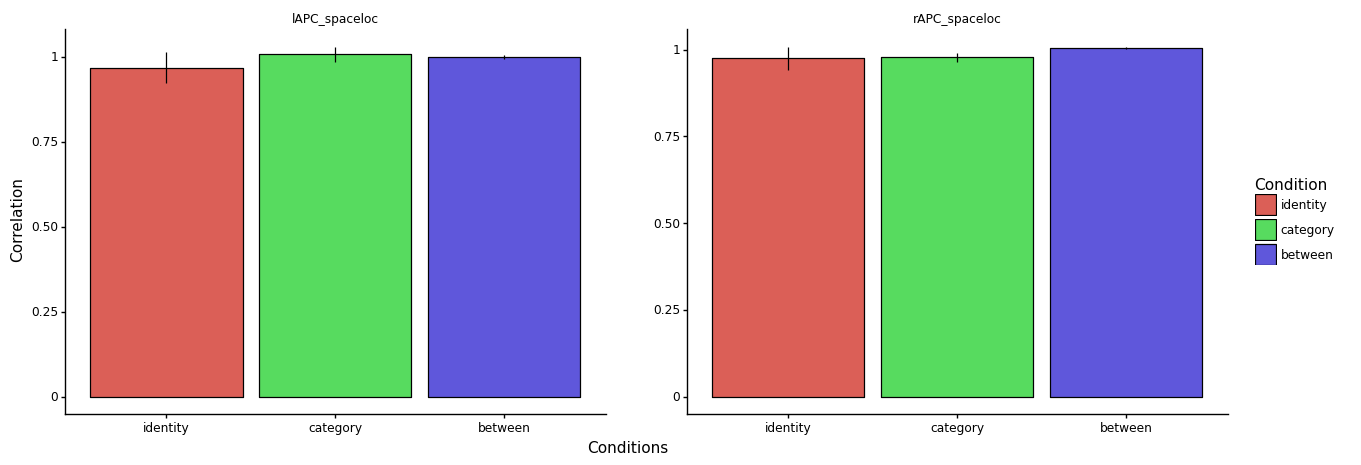

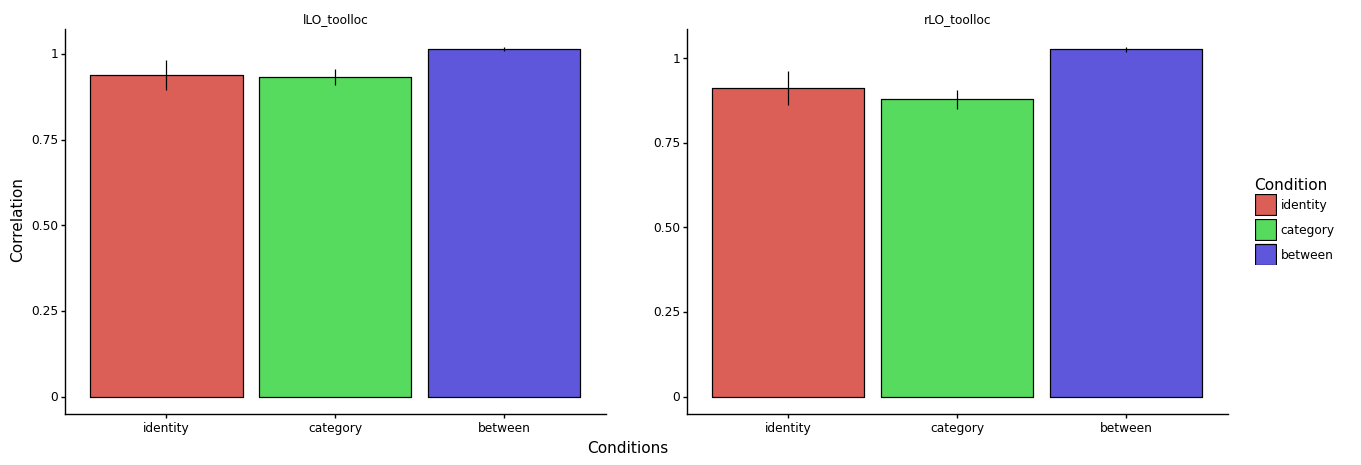

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_col : Removed 6 rows containing missing values.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_linerange : Removed 6 rows containing missing values.


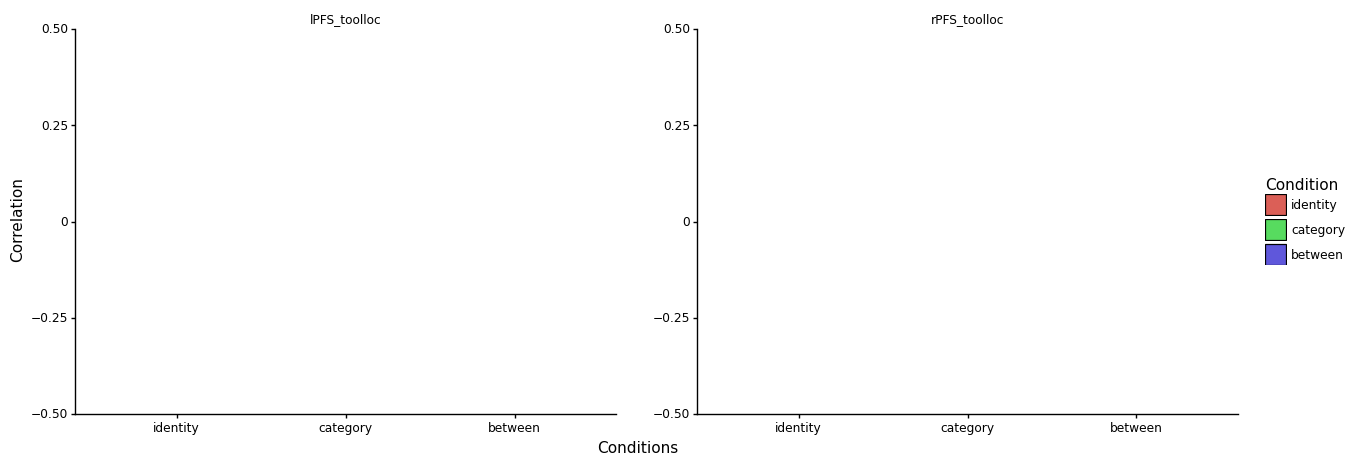

In [78]:
"""
Within/between mvpa for split-half
"""
data_type = "Correlation"
df = pd.read_csv(f'{study_dir}/derivatives/results/catmvpa/mvpa_summary_split.csv')

#pull out means and SEs seperately
df_mean = df[['roi', 'identity', 'category', 'between']]
df_se = df[['roi', 'identity_se', 'category_se', 'between_se']]

#melt dfs
df_mean = pd.melt(df_mean,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')
df_se = pd.melt(df_se,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')

conds = ['identity', 'category', 'between']

for rn, rr in enumerate(rois):
    
    #Append correlations
    summary_df = df_mean[df_mean['roi'] == f'l{rr}']
    summary_df = summary_df.append(df_mean[df_mean['roi'] == f'r{rr}'])
    
    #combine SEs
    se_df = df_se[df_se['roi'] == f'l{rr}']['Correlation']
    se_df = se_df.append(df_se[df_se['roi'] == f'r{rr}']['Correlation'])
    
    summary_df['se'] = se_df
    

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = conds, ordered = False)
    
    plot_bar(summary_df, 'Correlation')


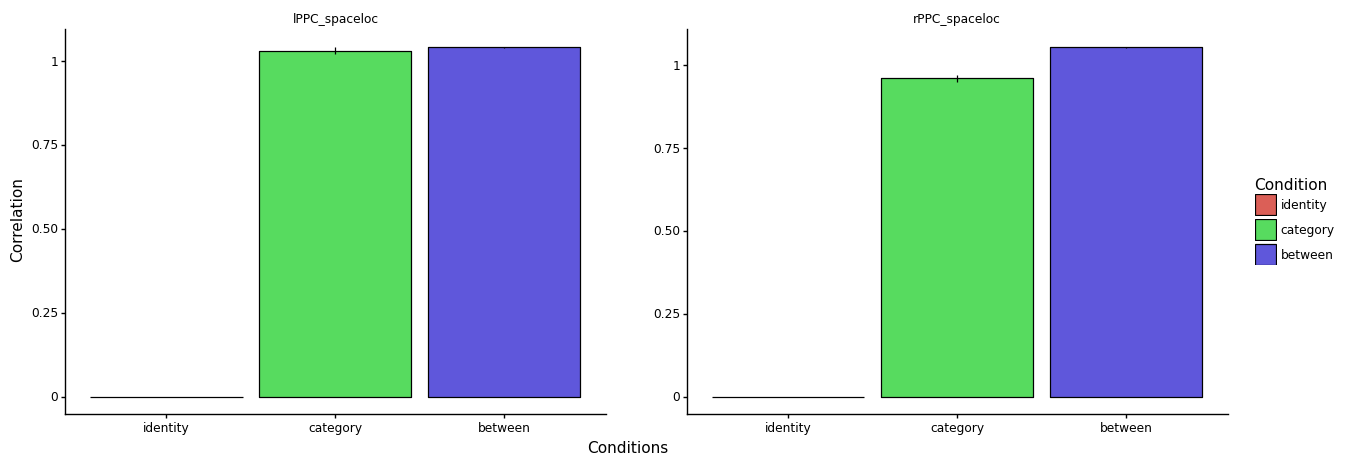

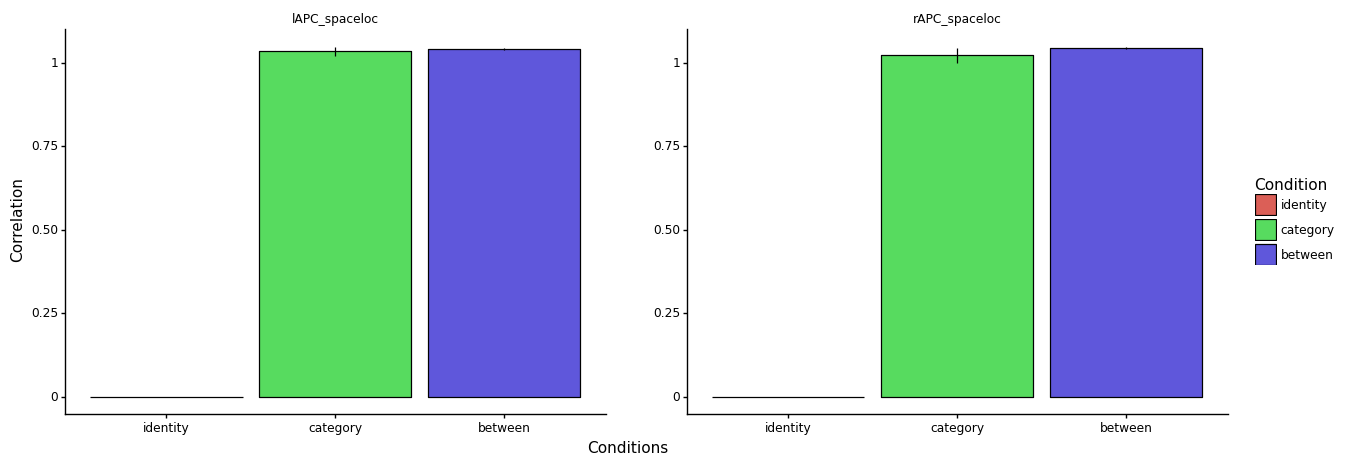

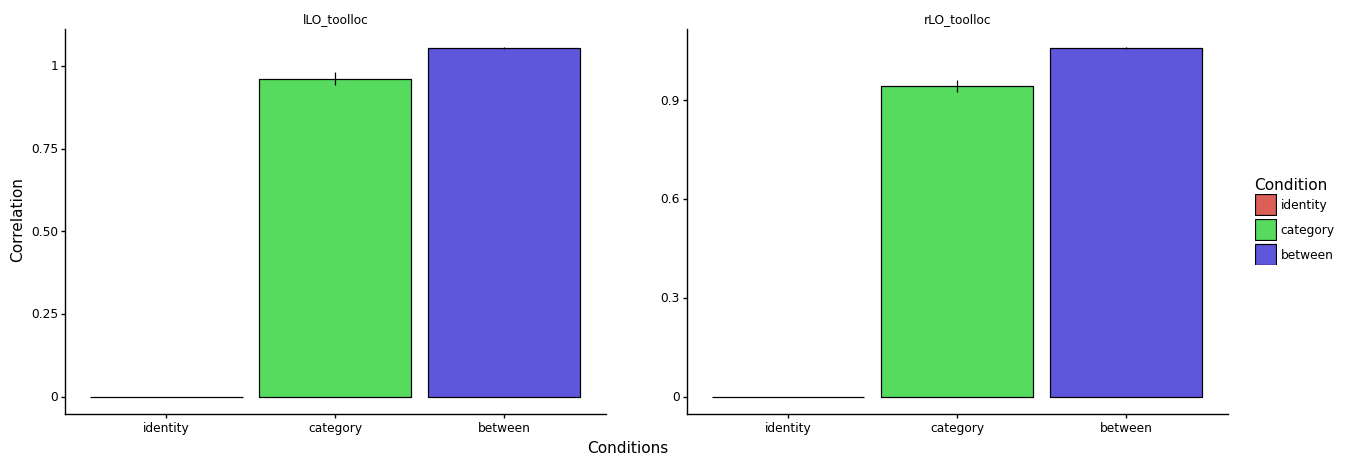

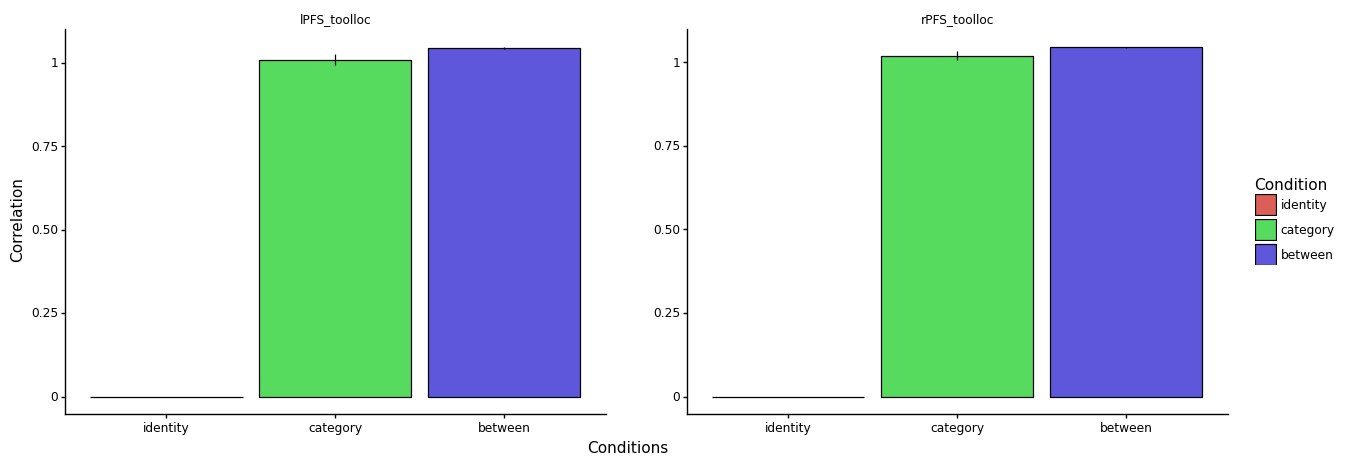

In [74]:
"""
Within/between mvpa for combined
"""
data_type = "Correlation"
df = pd.read_csv(f'{study_dir}/derivatives/results/catmvpa/mvpa_summary_combined.csv')

#pull out means and SEs seperately
df_mean = df[['roi', 'identity', 'category', 'between']]
df_se = df[['roi', 'identity_se', 'category_se', 'between_se']]

#melt dfs
df_mean = pd.melt(df_mean,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')
df_se = pd.melt(df_se,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')

conds = ['identity', 'category', 'between']

for rn, rr in enumerate(rois):
    
    #Append correlations
    summary_df = df_mean[df_mean['roi'] == f'l{rr}']
    summary_df = summary_df.append(df_mean[df_mean['roi'] == f'r{rr}'])
    
    #combine SEs
    se_df = df_se[df_se['roi'] == f'l{rr}']['Correlation']
    se_df = se_df.append(df_se[df_se['roi'] == f'r{rr}']['Correlation'])
    
    summary_df['se'] = se_df
    

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = conds, ordered = False)
    
    plot_bar(summary_df, 'Correlation')


In [67]:
"""
Average Activation for each ROI
"""
data_type = "activations"

for rn, rr in enumerate(rois):

    summary_df =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])
    temp_summary =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])

    # load ROI 1
    df = pd.read_csv(f'{results_dir}/l{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    summary_df['Condition'] = df.index
    summary_df[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/l{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    summary_df[f'se']  = df_se.to_list()
    summary_df['ROI'] = f'l{roi_names[rn]}'

    #load ROI 2
    df = pd.read_csv(f'{results_dir}/r{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    temp_summary['Condition'] = df.index
    temp_summary[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/r{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    temp_summary['se']  = df_se.to_list()
    temp_summary['ROI'] = f'r{roi_names[rn]}'


    #combine
    summary_df = summary_df.append(temp_summary)

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = conds, ordered = False)
    
    plot_bar(summary_df, data_type.capitalize())


FileNotFoundError: [Errno 2] No such file or directory: '/lab_data/behrmannlab/vlad/docnet/derivatives/results/lPPC_spaceloc_mean_activations.csv'